Laboratorio 4
Se tiene la siguiente ecuación:
$$
s =  \sum_{n=1}^{N} \frac{1}{n^{3}+3n+1}a^b
$$


La cual es una sumatoria en donde N∈N, a y b∈ R. Además, se sabe que N es un número que como máximo debe ser 4 294 967 29 y que tanto a como b no requieren mucha resolución.

Se le pide realizar un análisis comparativo entre funciones en Python y C. El programa en C debe incluir lo siguiente:

a) (1.0 punto) Una función que reciba como argumento de entrada el valor de N, a y b como argumentos de entrada y retorne el valor de s como salida. Para esta función usar la función pow para el cálculo del denominador y para el cálculo de a^b.
b)(1.0 punto) Una función que reciba como argumento de entrada el valor de N, a y b como argumentos de entrada y retorne el valor de s como salida. Para esta función solo usar la función pow para el cálculo de a^b.


In [1]:
%%file lib_func.c
#include<math.h>
//Se utiliza long double para res porque los valores del denominador pueden llegar a ser bastante elevados, para asi poder representar una mayor cantidad de decimales y tener mejor precision en los calculos
//Para la variable N, no se necesita usar lon, porque de manera empirica en otro archivo he comprobado que el valor 429469729 si puede ser expresado con int
long double func_1_C(int N, double a, double b){
    long double res = 0;
    for (double n = 1.0; n <= N; n++)
    {
        res = res + pow(a,b)/(pow(n,3) + 3*n + 1);
    }
    return res;
}
//El item b es resuelto en esta celda para generar un solo archivo y facilitar el llamado a c en python
long double func_2_C(int N, double a, double b){
    long double res = 0;
    for (double n = 1.0; n <= N; n++)
    {
        res = res + pow(a,b)/(n*n*n + 3*n + 1);
    }
    return res;
}

Overwriting lib_func.c


b) (1.0 punto) Una función que reciba como argumento de entrada el valor de N, a y b como argumentos de entrada y retorne el valor de s como salida. Para esta función solo usar la función pow para el cálculo de a^b.

In [2]:
#reuelto en la celda anterior

Un programa principal en Python donde se debe incluir:

c) (1.0 punto) Una función que reciba como argumento de entrada el valor de N, a y b como argumentos de entrada y retorne el valor de s como salida. Para esta función usar la función pow para el cálculo del denominador y para el cálculo de a^b.


In [3]:
def func_1_p(N, a, b):
    res = 0
    for n in range(1,N+1):
        res = res + pow(a,b)/(pow(n,3) + 3*n + 1)
    return res

d) (1.0 punto) Una función que reciba como argumento de entrada el valor de N, a y b como argumentos de entrada y retorne el valor de s como salida. Para esta función solo usar la función pow para el cálculo de a^b.


In [4]:
def func_2_p(N, a, b):
    res = 0
    for n in range(1,N+1):
        res = res + pow(a,b)/(n*n*n + 3*n + 1)
    return res

e) (2.0 punto) El llamado a la librería generada en C y los respectivos argumentos de entrada y de salida. Además, en comentarios, debe justificar los tipos de datos utilizados.



In [5]:
! gcc -fPIC -shared lib_func.c -o lib_func.so 

In [6]:
import numpy as np
import time
import statistics
import matplotlib.pyplot as plt
import ctypes


In [7]:
lib = ctypes.CDLL('./lib_func.so')
lib.func_1_C.argtypes = [ctypes.c_int, ctypes.c_double, ctypes.c_double]
lib.func_1_C.restype = ctypes.c_longdouble
lib.func_2_C.argtypes = [ctypes.c_int, ctypes.c_double, ctypes.c_double]
lib.func_2_C.restype = ctypes.c_longdouble 
#ambas funciones tienen los mismos tipos de datos de entrada y salida, por las indicaciones, se sabe que los valores de entrada son N = entero; a,b = decimales y, para una
#mejor precision en los calculos, se utilza long double para la salida
#para la declaracion de N no es necesario usar long, de este modo se ocupa menos memoria para esta variable.

f) (2.0 puntos) Validar que las 4 funciones dan los mismos resultados para los valores 1000, 3.5 y -0.25 para N,a y b, respectivamente.


In [8]:
#Ejecucion de funciones en python
N = 1000
a = 3.5
b = -0.25
prueba_py_1 = func_1_p(N, a, b)
prueba_py_2 = func_2_p(N, a, b)
print("ejecucion prueba 1 python:",prueba_py_1)
print("ejecucion prueba 2 python:",prueba_py_2)
#Ejecucion de funciones en C
prueba_c_1 = lib.func_1_C(N, a, b)
prueba_c_2 = lib.func_2_C(N, a, b)
print("ejecucion prueba 1 c:",prueba_c_1)
print("ejecucion prueba 2 c:",prueba_c_2)

ejecucion prueba 1 python: 0.24081597314253553
ejecucion prueba 2 python: 0.24081597314253553
ejecucion prueba 1 c: 0.24081597314253536
ejecucion prueba 2 c: 0.24081597314253536


g) (2.0 puntos) Realizar un análisis temporal de las 4 funciones considerando los datos del inciso f). Considerar graficar los tiempos para un valor de 50 iteraciones. Realizar comentarios acerca del resultado.


Mediana en python1: 315.2885001327377 us
Mediana en python2: 158.96499917289475 us
Mediana en c1: 30.328999855555594 us
Mediana en c2: 17.263500012631994 us


<function matplotlib.pyplot.show(close=None, block=None)>

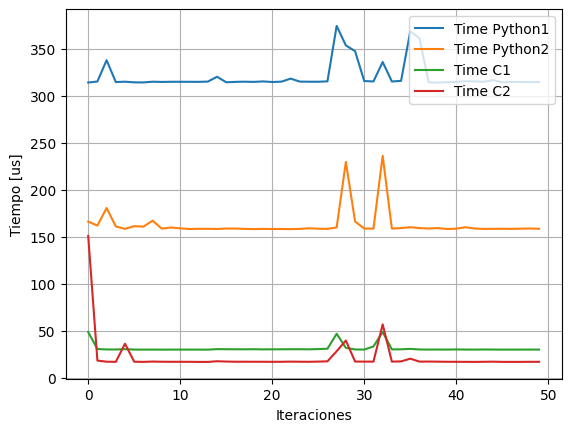

In [9]:
iter = 50
time_c_1 = []
time_c_2 = []
time_py_1 = []
time_py_2 = []
for n in range(iter):


    tic4 = time.perf_counter()
    func_2_p(N, a, b)
    toc4 = time.perf_counter()
    time_py_2.append(1e6*(toc4-tic4))

    tic3 = time.perf_counter()
    func_1_p(N, a, b)
    toc3 = time.perf_counter()
    time_py_1.append(1e6*(toc3-tic3))

    tic2 = time.perf_counter()
    lib.func_2_C(N, a, b)
    toc2 = time.perf_counter()
    time_c_2.append(1e6*(toc2-tic2))

    tic1 = time.perf_counter()
    lib.func_1_C(N, a, b)
    toc1 = time.perf_counter()
    time_c_1.append(1e6*(toc1-tic1))
#Estadisticas de los tiempos
print("Mediana en python1:",statistics.median(time_py_1),"us")
print("Mediana en python2:",statistics.median(time_py_2),"us")
print("Mediana en c1:",statistics.median(time_c_1),"us")
print("Mediana en c2:",statistics.median(time_c_2),"us")
#Grafica de tiempos
plt.plot(time_py_1)
plt.plot(time_py_2)
plt.plot(time_c_1)
plt.plot(time_c_2)
plt.grid()
plt.legend(["Time Python1", "Time Python2", "Time C1", "Time C2"])
plt.xlabel("Iteraciones")
plt.ylabel("Tiempo [us]")
plt.show
#Del grafico se observa que, los resultados son correspondientes a las medianas halladas; tambien, que C ejecuta ambos programas de manera mas eficiente que python

h) (2.0 puntos) Realizar un análisis temporal de las 4 funciones considerando N=1024,2048,4096,8192,16384,32768. Considerar 50 iteraciones para cada N. Graficar el resultado y brindar comentarios acerca del resultado.


################################################
Estadisticas para N = 1024
Mediana en python1: 324.13150074717123 us
Mediana en python2: 164.76000018883497 us
Mediana en c1: 31.570999453833792 us
Mediana en c2: 18.730499505181797 us
Mediana del tiempo de ejecucion: 98.16549982133438 us


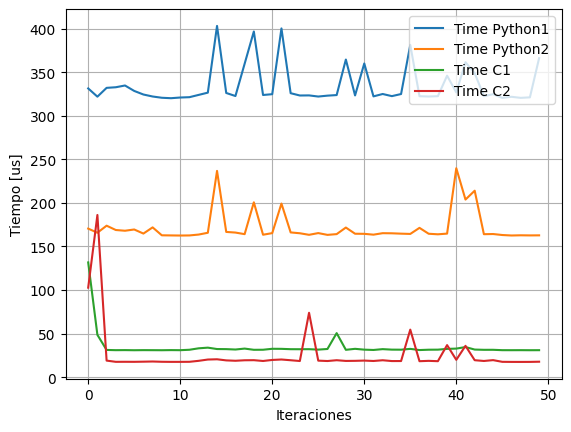

################################################
Estadisticas para N = 2048
Mediana en python1: 692.6039995960309 us
Mediana en python2: 376.2539990930236 us
Mediana en c1: 60.921500335098244 us
Mediana en c2: 34.477499866625294 us
Mediana del tiempo de ejecucion: 218.58774971406092 us


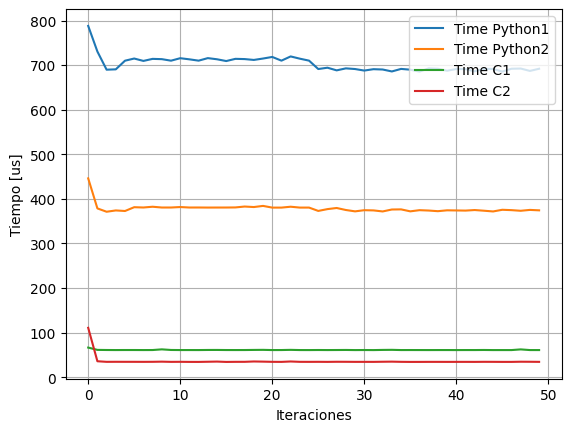

################################################
Estadisticas para N = 4096
Mediana en python1: 1435.1419995364267 us
Mediana en python2: 783.0905005903332 us
Mediana en c1: 118.47550013044383 us
Mediana en c2: 66.67599973297911 us
Mediana del tiempo de ejecucion: 450.78300036038854 us


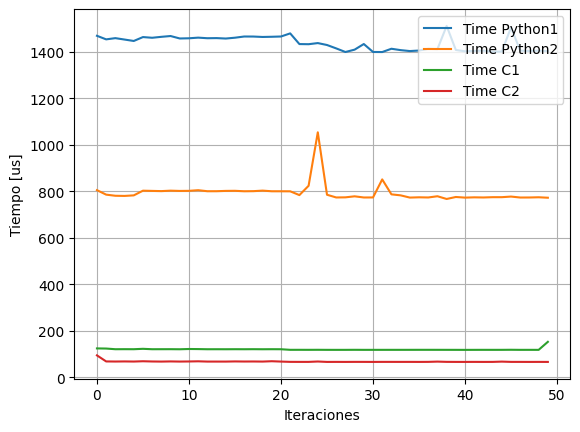

################################################
Estadisticas para N = 8192
Mediana en python1: 2897.194999604835 us
Mediana en python2: 1594.9564995025867 us
Mediana en c1: 236.1939996262663 us
Mediana en c2: 133.29000012163306 us
Mediana del tiempo de ejecucion: 915.5752495644265 us


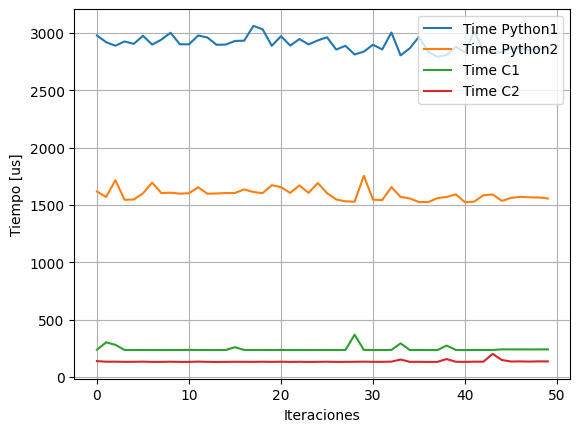

################################################
Estadisticas para N = 16384
Mediana en python1: 5875.879499399161 us
Mediana en python2: 3309.1244995375746 us
Mediana en c1: 471.6044995802804 us
Mediana en c2: 265.5120006238576 us
Mediana del tiempo de ejecucion: 1890.3644995589275 us


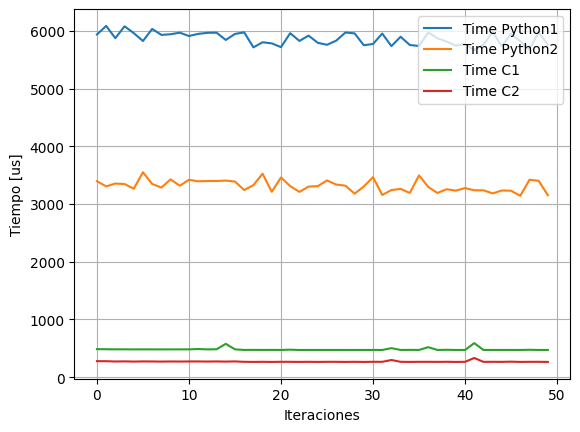

################################################
Estadisticas para N = 32768
Mediana en python1: 11599.882999689726 us
Mediana en python2: 6566.682499396848 us
Mediana en c1: 940.7560000909143 us
Mediana en c2: 528.0280001898063 us
Mediana del tiempo de ejecucion: 3753.719249743881 us


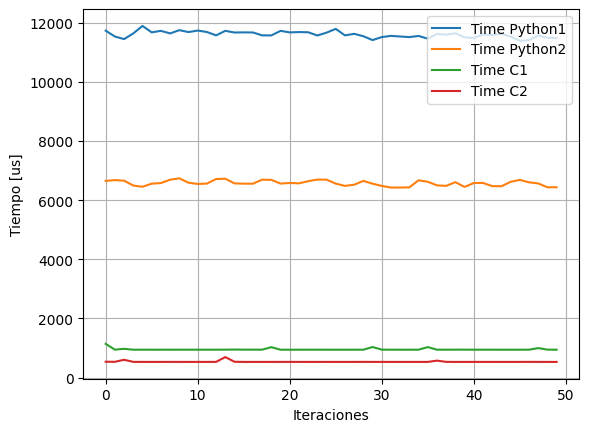

grafica tiempo mediano vs N


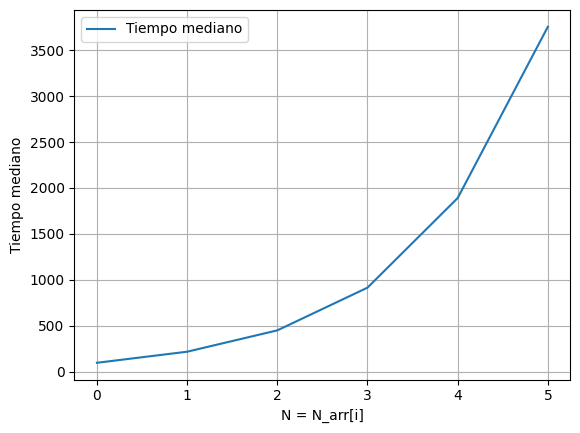

In [10]:
N_arr = [1024, 2048, 4096, 8192, 16384, 32768]
time_time_arr = []
for n_val in N_arr:
    time_c_1_8 = []
    time_c_2_8 = []
    time_py_1_8 = []
    time_py_2_8= []
    for n in range(iter):
        tic4 = time.perf_counter()
        func_2_p(n_val, a, b)
        toc4 = time.perf_counter()
        time_py_2_8.append(1e6*(toc4-tic4))

        tic3 = time.perf_counter()
        func_1_p(n_val, a, b)
        toc3 = time.perf_counter()
        time_py_1_8.append(1e6*(toc3-tic3))

        tic2 = time.perf_counter()
        lib.func_2_C(n_val, a, b)
        toc2 = time.perf_counter()
        time_c_2_8.append(1e6*(toc2-tic2))

        tic1 = time.perf_counter()
        lib.func_1_C(n_val, a, b)
        toc1 = time.perf_counter()
        time_c_1_8.append(1e6*(toc1-tic1))
        
        #Estadisticas de los tiempos
    print("################################################")
    print("Estadisticas para N =",n_val)
    print("Mediana en python1:",statistics.median(time_py_1_8),"us")
    print("Mediana en python2:",statistics.median(time_py_2_8),"us")
    print("Mediana en c1:",statistics.median(time_c_1_8),"us")
    print("Mediana en c2:",statistics.median(time_c_2_8),"us")
    time_arr = [statistics.median(time_py_1_8), statistics.median(time_py_2_8), statistics.median(time_c_1_8), statistics.median(time_c_2_8)]
    t_median = statistics.median(time_arr)
    print("Mediana del tiempo de ejecucion:",t_median, "us")
    #Grafica de tiempos
    plt.plot(time_py_1_8)
    plt.plot(time_py_2_8)
    plt.plot(time_c_1_8)
    plt.plot(time_c_2_8)
    plt.grid()
    plt.legend(["Time Python1", "Time Python2", "Time C1", "Time C2"])
    plt.xlabel("Iteraciones")
    plt.ylabel("Tiempo [us]")
    plt.show()
    plt.close()
    time_time_arr.append(t_median)
print("grafica tiempo mediano vs N")
plt.plot(time_time_arr)
plt.grid()
plt.legend(["Tiempo mediano"])
plt.xlabel("N = N_arr[i]")
plt.ylabel("Tiempo mediano")
plt.show()
plt.close()

#Luego de ver las graficas de los tiempos de ejecucion de cada programa, se observa que los datos de la mediana se relacionan a lo mostrado en el grafico
#ademas, se puede concluir que la funcion mas eficiente es la segunda funcion de C; tambien, ambas funciones en c son mas eficientes que su analogo en python y, 
#La funcion mas lenta en C se ejecuta más rapido que la mas raida de python
#Del ultimo grafico se puede concluir que el tiempo de ejecucion incrementa de manera proporcional con el valor de N

i) (3.0 puntos) Calcular y graficar el SpeedUP para los mismos rangos de N del inciso anterior. Considerar que el SpeedUP debe ser entre las funciones análogas entre las funciones en C y Python. Realizar comentarios acerca de sus resultados

grafica speedup de la primera funcion vs N


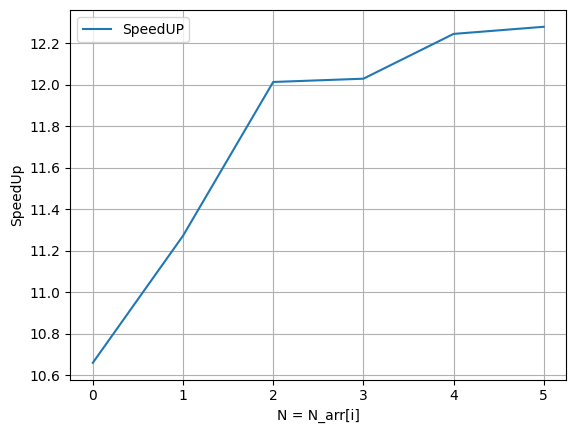

grafica speedup de la segunda funcion vs N


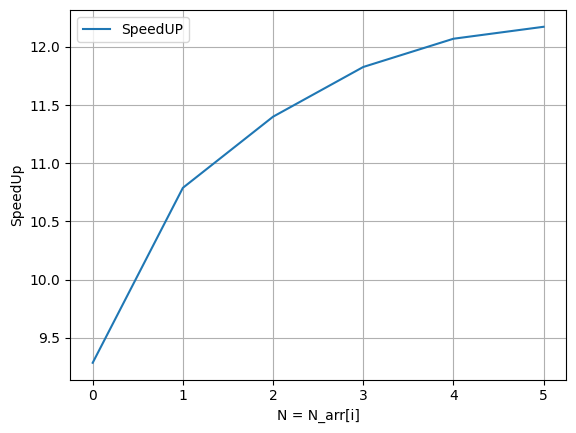

In [11]:
N_arr = [1024, 2048, 4096, 8192, 16384, 32768]
SU1 = []
SU2 = []
for n_val in N_arr:
    time_c_1_8 = []
    time_c_2_8 = []
    time_py_1_8 = []
    time_py_2_8= []
    for n in range(iter):
        tic4 = time.perf_counter()
        func_2_p(n_val, a, b)
        toc4 = time.perf_counter()
        time_py_2_8.append(1e6*(toc4-tic4))

        tic3 = time.perf_counter()
        func_1_p(n_val, a, b)
        toc3 = time.perf_counter()
        time_py_1_8.append(1e6*(toc3-tic3))

        tic2 = time.perf_counter()
        lib.func_2_C(n_val, a, b)
        toc2 = time.perf_counter()
        time_c_2_8.append(1e6*(toc2-tic2))

        tic1 = time.perf_counter()
        lib.func_1_C(n_val, a, b)
        toc1 = time.perf_counter()
        time_c_1_8.append(1e6*(toc1-tic1))
    median_py1 = statistics.median(time_py_1_8)
    median_py2 = statistics.median(time_py_2_8)
    median_c1 = statistics.median(time_c_1_8)
    median_c2 = statistics.median(time_c_2_8)
    SU_1 = median_py1/median_c1
    SU_2 = median_py2/median_c2
    SU1.append(SU_1)
    SU2.append(SU_2)
print("grafica speedup de la primera funcion vs N")
plt.plot(SU1)
plt.grid()
plt.legend(["SpeedUP"])
plt.xlabel("N = N_arr[i]")
plt.ylabel("SpeedUp")
plt.show()
plt.close()

print("grafica speedup de la segunda funcion vs N")
plt.plot(SU2)
plt.grid()
plt.legend(["SpeedUP"])
plt.xlabel("N = N_arr[i]")
plt.ylabel("SpeedUp")
plt.show()
plt.close()

#al analizar las graficas de los speedups, se puede concluir que los valores del speedup incrementan con el valor de N, lo cual tiene sentido; pues, al analizar los 
#valores medios de los tiempos de ejecución; a pesar de que crecen a medida que el valor de N aumenta, los valores de los tiempos de ejecucion en python generalmente crecen más
#rapido que los valores de los tiempos de ejecucion en C, causando un incremento en el speedup a medida que N aumenta.